<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_12/01_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal component analysis (PCA)
[Wiki](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [ ]:
import pandas as pd

df = pd.read_parquet('https://github.com/gumdropsteve/datasets/raw/master/airlines.parquet')

df.columns

Index(['ArrDelayBinary', 't_Year', 't_Month', 'DayofMonth', 'DayofWeek',
       'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'ActualElapsedTime', 'Origin', 'Dest', 'Distance', 'Diverted'],
      dtype='object')

In [ ]:
cols = ['ArrDelayBinary','UniqueCarrier', 'FlightNum', 'ActualElapsedTime', 'Origin', 'Dest', 'Distance', 'Diverted']

df = df[cols]

df

,ArrDelayBinary,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance,Diverted
0,0,5.0,430.0,49.0,185.0,244.0,110.0,0.0
1,0,4.0,262.0,117.0,156.0,11.0,595.0,0.0
2,0,12.0,683.0,116.0,189.0,175.0,412.0,0.0
3,0,3.0,618.0,96.0,180.0,11.0,545.0,0.0
4,0,3.0,1630.0,126.0,226.0,171.0,866.0,0.0
...,...,...,...,...,...,...,...,...
3999995,0,7.0,821.0,71.0,11.0,150.0,332.0,0.0
3999996,0,14.0,103.0,54.0,167.0,22.0,321.0,0.0
3999997,0,3.0,1098.0,32.0,133.0,8.0,108.0,0.0
3999998,0,14.0,103.0,66.0,27.0,149.0,395.0,0.0


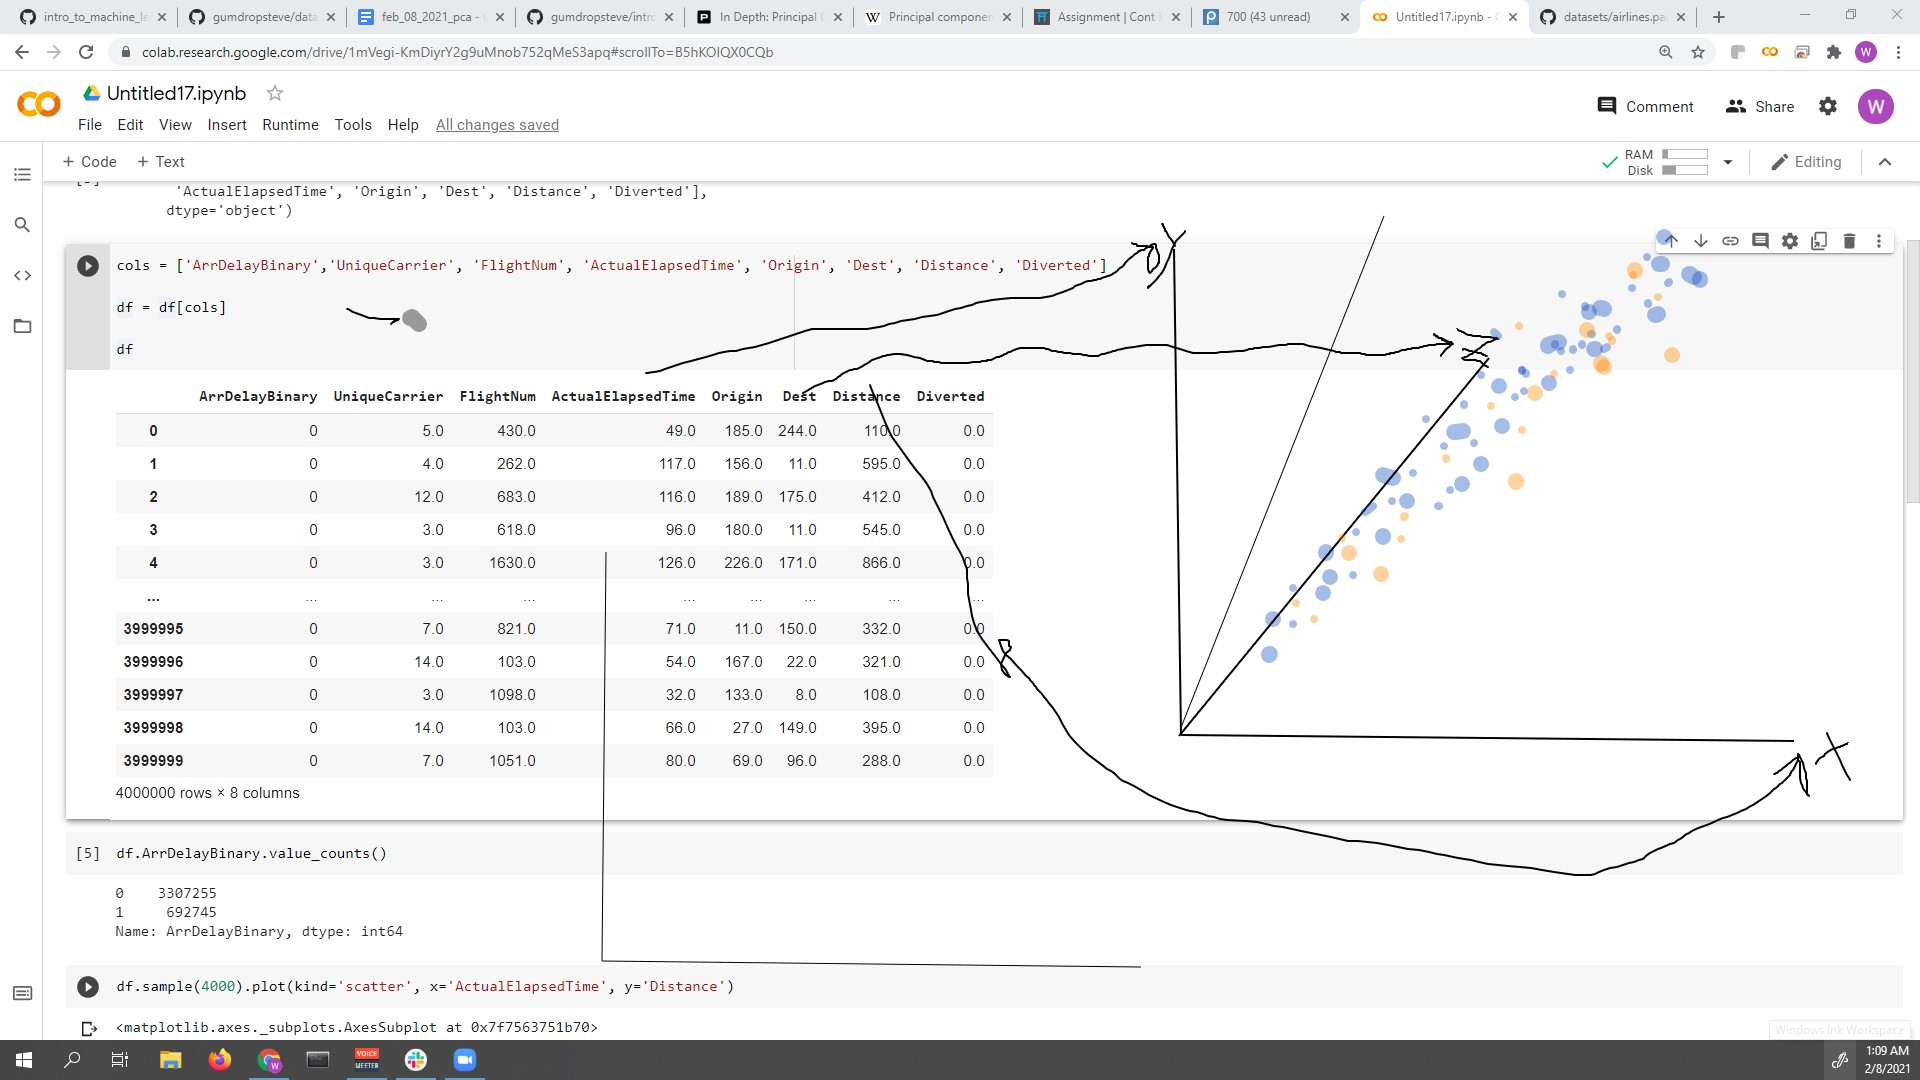

In [ ]:
df.ArrDelayBinary.value_counts()

0    3307255
1     692745
Name: ArrDelayBinary, dtype: int64

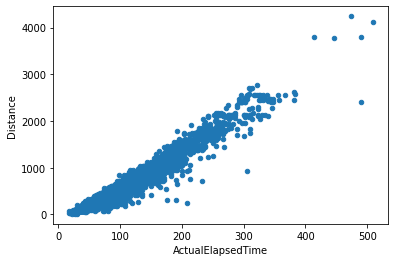

In [ ]:
df.sample(4000).plot(kind='scatter', x='ActualElapsedTime', y='Distance')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


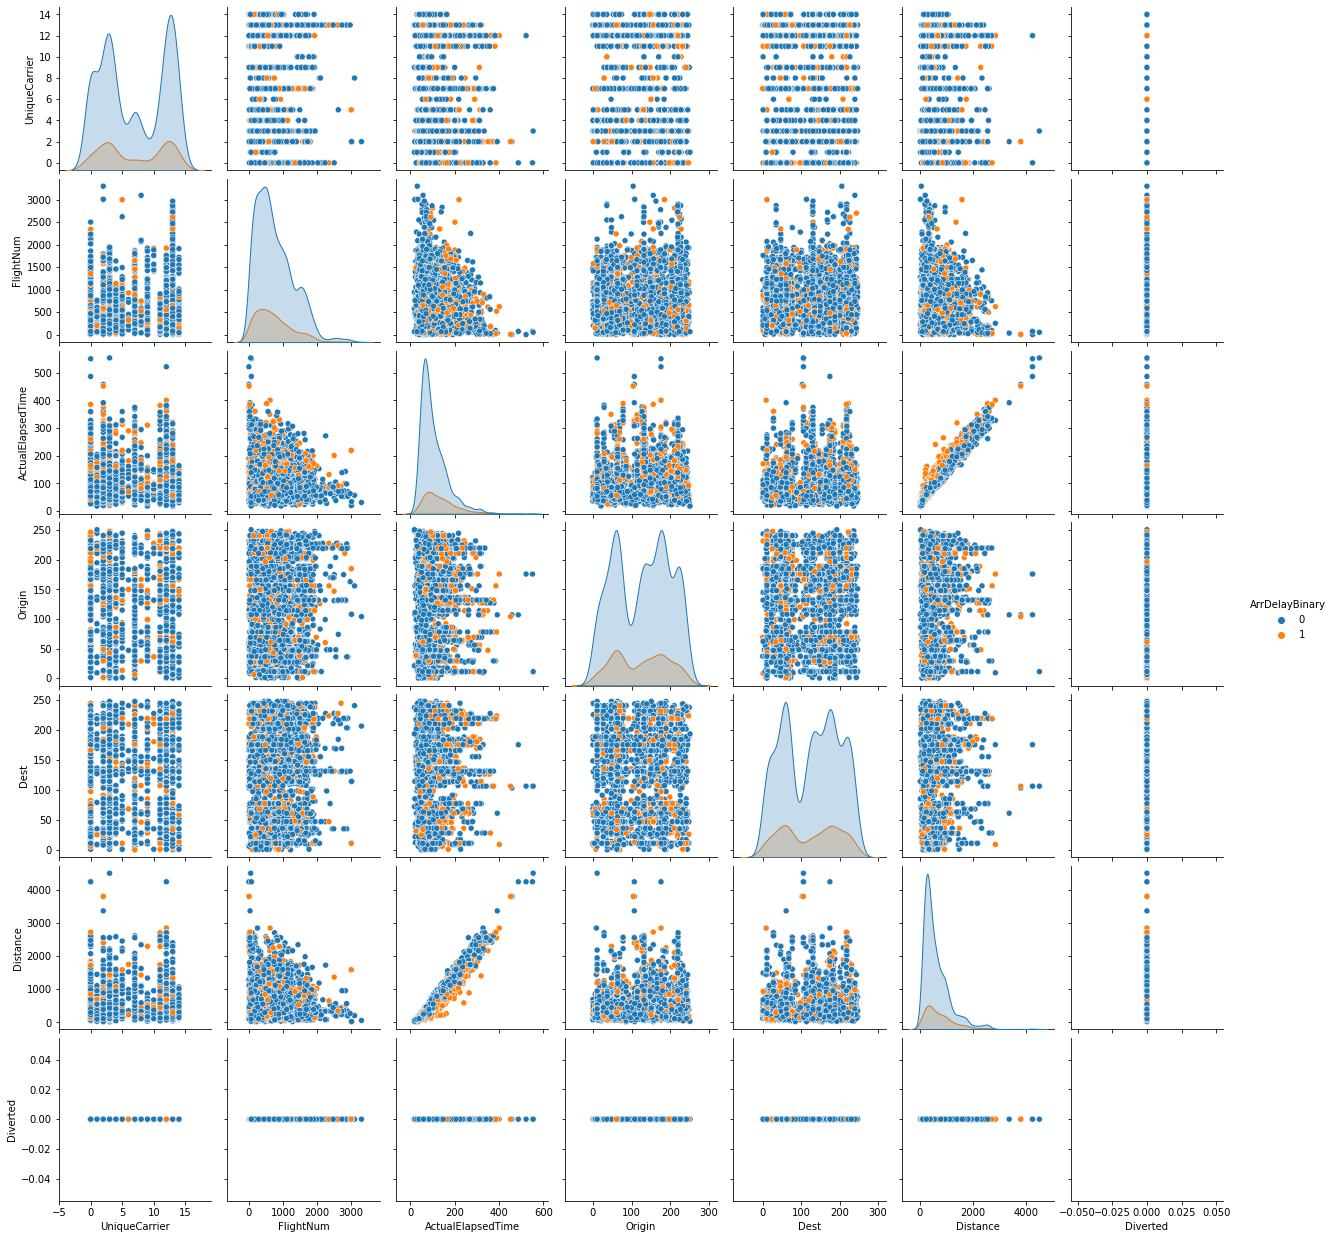

In [ ]:
import seaborn as sns

sns.pairplot(df.sample(4000), hue='ArrDelayBinary')

# PCA

In [ ]:
df.columns

Index(['ArrDelayBinary', 'UniqueCarrier', 'FlightNum', 'ActualElapsedTime',
       'Origin', 'Dest', 'Distance', 'Diverted'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['ArrDelayBinary', 'Diverted'], axis=1)
y = df.ArrDelayBinary

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)

In [ ]:
X_train

,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance,Diverted
2696408,13.0,780.0,53.0,136.0,237.0,198.0,0.0
1754566,14.0,964.0,119.0,220.0,1.0,896.0,0.0
292673,3.0,409.0,38.0,151.0,138.0,129.0,0.0
3921774,0.0,364.0,64.0,13.0,63.0,190.0,0.0
1217837,2.0,928.0,83.0,167.0,240.0,487.0,0.0
...,...,...,...,...,...,...,...
74076,3.0,1039.0,78.0,56.0,231.0,307.0,0.0
2958876,0.0,897.0,97.0,27.0,175.0,409.0,0.0
2243806,5.0,418.0,22.0,51.0,195.0,37.0,0.0
194896,9.0,1578.0,105.0,37.0,28.0,370.0,0.0


[Scaling the Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(pd.DataFrame(X['ActualElapsedTime']))

array([[-0.9344944 ],
       [ 0.12881447],
       [ 0.11317759],
       ...,
       [-1.2003216 ],
       [-0.66866714],
       [-0.4497506 ]], dtype=float32)

In [ ]:
ages = [n for n in range(20)]

scaler.fit_transform(pd.DataFrame(ages))

array([[-1.64750894],
       [-1.47408695],
       [-1.30066495],
       [-1.12724296],
       [-0.95382097],
       [-0.78039897],
       [-0.60697698],
       [-0.43355498],
       [-0.26013299],
       [-0.086711  ],
       [ 0.086711  ],
       [ 0.26013299],
       [ 0.43355498],
       [ 0.60697698],
       [ 0.78039897],
       [ 0.95382097],
       [ 1.12724296],
       [ 1.30066495],
       [ 1.47408695],
       [ 1.64750894]])

In [ ]:
ages

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
ages = [n for n in range(40)]

scaler.fit_transform(pd.DataFrame(ages))

array([[-1.68927752],
       [-1.6026479 ],
       [-1.51601829],
       [-1.42938867],
       [-1.34275905],
       [-1.25612944],
       [-1.16949982],
       [-1.0828702 ],
       [-0.99624059],
       [-0.90961097],
       [-0.82298136],
       [-0.73635174],
       [-0.64972212],
       [-0.56309251],
       [-0.47646289],
       [-0.38983327],
       [-0.30320366],
       [-0.21657404],
       [-0.12994442],
       [-0.04331481],
       [ 0.04331481],
       [ 0.12994442],
       [ 0.21657404],
       [ 0.30320366],
       [ 0.38983327],
       [ 0.47646289],
       [ 0.56309251],
       [ 0.64972212],
       [ 0.73635174],
       [ 0.82298136],
       [ 0.90961097],
       [ 0.99624059],
       [ 1.0828702 ],
       [ 1.16949982],
       [ 1.25612944],
       [ 1.34275905],
       [ 1.42938867],
       [ 1.51601829],
       [ 1.6026479 ],
       [ 1.68927752]])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df.drop(['ArrDelayBinary', 'Diverted'], axis=1)
cols = X.columns  # save column names for later
y = df.ArrDelayBinary

# scale the X data
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)

In [ ]:
pd.DataFrame(X_train, columns=cols)

,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance
0,-0.786540,-0.525220,2.583807,1.405633,-1.383206,2.868768
1,0.412738,-0.971168,-0.137013,-0.686693,-1.000479,-0.115315
2,0.812498,-0.303178,-1.215958,1.547006,-0.532702,-1.059497
3,0.412738,-0.611051,0.738653,-0.941165,0.417027,0.720073
4,-0.986420,-1.157758,-1.012679,-0.163611,1.210830,-0.849679
...,...,...,...,...,...,...
2799995,-0.986420,-0.752859,-0.527935,-0.686693,-1.383206,-0.832194
2799996,-1.186300,-1.049536,0.801201,0.826002,0.771403,0.739501
2799997,1.012378,-0.765920,-0.527935,-1.124950,0.700528,-0.606834
2799998,0.012979,-1.204405,1.004480,0.826002,0.558777,1.258218


#### Make a model...

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds = lr.predict(X_test)

pd.Series(preds).value_counts()

0    1143760
1      56240
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.84807

And if we didn't use scaler...

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['ArrDelayBinary', 'Diverted'], axis=1)
y = df.ArrDelayBinary

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds = lr.predict(X_test)

pd.Series(preds).value_counts()

0    1143749
1      56251
dtype: int64

In [ ]:
accuracy_score(y_test, preds)

0.8480741666666667

Let's do the PCA...

Docs example... https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

pca = PCA()

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pd.DataFrame(X)

,0,1
0,-1,-1
1,-2,-1
2,-3,-2
3,1,1
4,2,1
5,3,2


In [ ]:
pca.explained_variance_ratio_

array([0.99244289, 0.00755711])

In [ ]:
np.sum(pca.explained_variance_ratio_)

1.0

In [ ]:
pca.singular_values_

array([6.30061232, 0.54980396])

Our example...

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

In [ ]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pd.DataFrame(X_train, columns=cols).tail(2)

,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance
2799998,0.012979,-1.204405,1.004480,0.826002,0.558777,1.258218
2799999,1.212258,0.486095,-1.184685,-1.110813,-1.241455,-1.049783


In [ ]:
pca.explained_variance_ratio_

array([0.34440333, 0.19147707, 0.16550203, 0.15943229, 0.13470467,
       0.00448061])

In [ ]:
np.sum(pca.explained_variance_ratio_)

1.0000000000000002

Is the order of the output the same order as my columns or is it from greatest to least?

In [ ]:
X_train = pd.DataFrame(X_train, columns=cols)

# move Distance to front, all other columns 1 to the right
X_train = X_train[['Distance', 'UniqueCarrier', 'FlightNum', 'ActualElapsedTime', 'Origin', 'Dest']]

pca = PCA()

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([0.34440355, 0.19147695, 0.16550203, 0.1594322 , 0.13470466,
       0.00448061])

They're output in order from greatest to least important...


[.fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform) - 	
Fit the model with X and apply the dimensionality reduction on X.

In [ ]:
pca = PCA()

pca.fit_transform(X_train)

array([[ 3.9201179 ,  0.40479216, -0.01340547,  2.0064926 ,  0.31349257,
        -0.18186744],
       [-0.16253795,  0.7589298 , -1.346876  ,  0.04508867,  0.44547346,
        -0.00935196],
       [-1.5450919 , -0.9900094 , -0.74017483,  1.3985827 , -0.38794377,
        -0.07695723],
       ...,
       [-0.7913399 , -0.3121676 , -1.0776067 , -1.4417272 ,  0.21768318,
         0.05328346],
       [ 1.8830537 , -0.734524  , -0.6801846 ,  0.14949435, -0.6628615 ,
        -0.16587643],
       [-1.9783294 ,  0.56756526, -0.65968114, -0.04966632,  1.5179355 ,
        -0.08985696]], dtype=float32)

In [ ]:
pd.DataFrame(pca.fit_transform(X_train))

,0,1,2,3,4,5
0,3.920118,0.404792,-0.013405,2.006493,0.313493,-0.181867
1,-0.162538,0.758930,-1.346876,0.045089,0.445473,-0.009352
2,-1.545092,-0.990009,-0.740175,1.398583,-0.387944,-0.076957
3,1.021689,0.048988,-0.588375,-1.044055,0.430947,0.007213
4,-0.792419,0.143821,-0.390189,-0.969312,-1.947750,-0.132934
...,...,...,...,...,...,...
2799995,-0.775446,1.841990,-0.730730,0.406333,-0.399768,0.203680
2799996,1.561821,-0.109437,-0.025204,0.097647,-1.584867,0.039421
2799997,-0.791340,-0.312168,-1.077607,-1.441727,0.217683,0.053283
2799998,1.883054,-0.734524,-0.680185,0.149494,-0.662862,-0.165876


In [ ]:
pd.DataFrame(pca.fit_transform(X_train))[0].value_counts()

-0.755292    65
-1.832714    51
-1.843342    48
-1.173951    48
-1.164800    44
             ..
-0.514285     1
-0.514284     1
-0.514281     1
-0.514279     1
-2.000010     1
Name: 0, Length: 1485199, dtype: int64

In [ ]:
lr = LogisticRegression()

X_train = pca.fit_transform(X_train)

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test = pca.fit_transform(X_test)

preds = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, preds)

0.8482375